# Project 5 - Air Toxicity and Chronic Respiratory Diseases - Kaggel Competition

## Problem Statement

We will be developing a model that can accurately predict the incidence of chronic respiratory diseases based on air toxicity parameters. We will be submitting our results in the Air Toxicity and Chronic Respiratory Disease kaggle competition. ([Linked here](https://www.kaggle.com/competitions/air-toxicity-and-chronic-respiratory-diseases-us/data))
We believe that this analysis will be useful to epidemiologists in determining environmental settings that trigger respiratory diseases and estimating resources necessary to treat patients suffering from respiratory diseases.
We are planning on fitting various regression models on our data to predict disease incidence rates.


### Contents:
- [Train Data](#Train-Data)
- [Test Data](#Test-Data)
- [Imputation](#Imputation)
- [Modeling](#Modeling)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

### Import library

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor


In [ ]:
# train and test dataset in this notebook are from 01b data preparation

## Train Data

In [2]:
train = pd.read_csv('../train_complete.csv')
train.head()

,ID,State_Name,Year,Age,Incidence,Arithmetic_Mean_mean_Lead_(TSP)_STP,Arithmetic_Mean_min_Lead_(TSP)_STP,Arithmetic_Mean_max_Lead_(TSP)_STP,Arithmetic_Mean_mean_Lead_(TSP)_STP_l2,Arithmetic_Mean_min_Lead_(TSP)_STP_l2,...,X1st_Max_Value_max_Benzene_l8,X1st_Max_Value_max_Ethylbenzene_l2,X1st_Max_Value_max_Ethylbenzene_l5,X1st_Max_Value_max_Ethylbenzene_l8,X1st_Max_Value_max_Toluene_l2,X1st_Max_Value_max_Toluene_l5,X1st_Max_Value_max_Toluene_l8,X1st_Max_Value_max_o-Xylene_l2,X1st_Max_Value_max_o-Xylene_l5,X1st_Max_Value_max_o-Xylene_l8
0,f8312a4,Alabama,1990,65-69,4685.284313,0.664543,0.0,7.96,1.071302,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3effa36,Alabama,1990,70-74,4827.052043,0.664543,0.0,7.96,1.071302,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1e8044b,Alabama,1990,75-79,4377.956914,0.664543,0.0,7.96,1.071302,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,d875d65,Alabama,1990,80-84,3822.732993,0.664543,0.0,7.96,1.071302,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,46e6695,Alabama,1990,85-89,3470.199503,0.664543,0.0,7.96,1.071302,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
train.shape

(4500, 200)

In [4]:
# Eliminate columns that have more than 20% missing values

train.dropna(thresh = train.shape[0]*0.8, axis = 1, inplace = True)

In [5]:
# create a column_keep to match column of train and test

column_keep = train.drop(columns='Incidence').columns

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         4500 non-null   object 
 1   State_Name                                 4500 non-null   object 
 2   Year                                       4500 non-null   int64  
 3   Age                                        4500 non-null   object 
 4   Incidence                                  4500 non-null   float64
 5   Arithmetic_Mean_mean_Arsenic_PM2.5_LC      3960 non-null   float64
 6   Arithmetic_Mean_mean_Chromium_PM2.5_LC     3960 non-null   float64
 7   Arithmetic_Mean_mean_Lead_PM2.5_LC         3960 non-null   float64
 8   Arithmetic_Mean_mean_Manganese_PM2.5_LC    3960 non-null   float64
 9   Arithmetic_Mean_mean_Nickel_PM2.5_LC       3960 non-null   float64
 10  Arithmetic_Mean_min_Arse

In [7]:
train_dummy = pd.get_dummies(train, columns=['Age'], drop_first=True)
train_dummy.head()

,ID,State_Name,Year,Incidence,Arithmetic_Mean_mean_Arsenic_PM2.5_LC,Arithmetic_Mean_mean_Chromium_PM2.5_LC,Arithmetic_Mean_mean_Lead_PM2.5_LC,Arithmetic_Mean_mean_Manganese_PM2.5_LC,Arithmetic_Mean_mean_Nickel_PM2.5_LC,Arithmetic_Mean_min_Arsenic_PM2.5_LC,...,Arithmetic_Mean_min_Nitric_oxide_(NO)_l2,Arithmetic_Mean_max_Nitric_oxide_(NO)_l2,X1st_Max_Value_mean_Nitric_oxide_(NO)_l2,X1st_Max_Value_min_Nitric_oxide_(NO)_l2,X1st_Max_Value_max_Nitric_oxide_(NO)_l2,Age_70-74,Age_75-79,Age_80-84,Age_85-89,Age_90-94
0,f8312a4,Alabama,1990,4685.284313,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0
1,3effa36,Alabama,1990,4827.052043,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0
2,1e8044b,Alabama,1990,4377.956914,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0
3,d875d65,Alabama,1990,3822.732993,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0
4,46e6695,Alabama,1990,3470.199503,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,0,1,0


## Test Data

In [8]:
test = pd.read_csv('../test_complete.csv')
test.head()

,ID,State_Name,Year,Age,Arithmetic_Mean_mean_Lead_(TSP)_STP,Arithmetic_Mean_min_Lead_(TSP)_STP,Arithmetic_Mean_max_Lead_(TSP)_STP,Arithmetic_Mean_mean_Lead_(TSP)_STP_l2,Arithmetic_Mean_min_Lead_(TSP)_STP_l2,Arithmetic_Mean_max_Lead_(TSP)_STP_l2,...,X1st_Max_Value_max_Benzene_l8,X1st_Max_Value_max_Ethylbenzene_l2,X1st_Max_Value_max_Ethylbenzene_l5,X1st_Max_Value_max_Ethylbenzene_l8,X1st_Max_Value_max_Toluene_l2,X1st_Max_Value_max_Toluene_l5,X1st_Max_Value_max_Toluene_l8,X1st_Max_Value_max_o-Xylene_l2,X1st_Max_Value_max_o-Xylene_l5,X1st_Max_Value_max_o-Xylene_l8
0,6c06615,Delaware,1990,65-69,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e0cf76e,Delaware,1990,70-74,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,e9f95f0,Delaware,1990,75-79,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5dffe44,Delaware,1990,80-84,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9f9ea9b,Delaware,1990,85-89,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
test.shape

(4680, 199)

In [10]:
test = test[column_keep]

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4680 entries, 0 to 4679
Data columns (total 49 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         4680 non-null   object 
 1   State_Name                                 4680 non-null   object 
 2   Year                                       4680 non-null   int64  
 3   Age                                        4680 non-null   object 
 4   Arithmetic_Mean_mean_Arsenic_PM2.5_LC      3852 non-null   float64
 5   Arithmetic_Mean_mean_Chromium_PM2.5_LC     3852 non-null   float64
 6   Arithmetic_Mean_mean_Lead_PM2.5_LC         3852 non-null   float64
 7   Arithmetic_Mean_mean_Manganese_PM2.5_LC    3852 non-null   float64
 8   Arithmetic_Mean_mean_Nickel_PM2.5_LC       3852 non-null   float64
 9   Arithmetic_Mean_min_Arsenic_PM2.5_LC       3852 non-null   float64
 10  Arithmetic_Mean_min_Chro

In [12]:
test_dummy = pd.get_dummies(test, columns=['Age'], drop_first=True)

In [13]:
test_numeric = test_dummy.drop(columns=['ID','State_Name'])

In [14]:
test_numeric.shape

(4680, 51)

### EDA

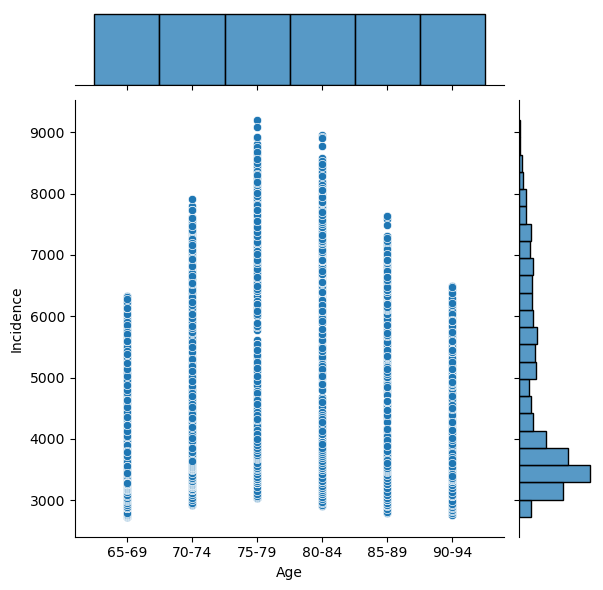

In [83]:
sns.jointplot(x=train['Age'], y=train['Incidence']);

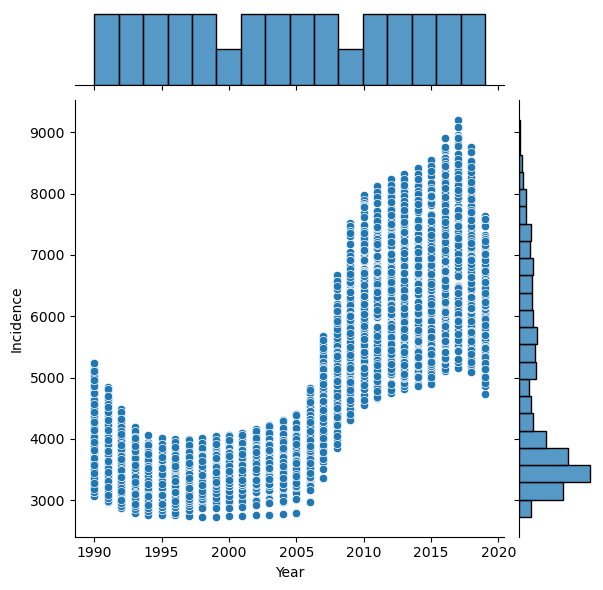

In [84]:
sns.jointplot(x=train['Year'], y=train['Incidence']);

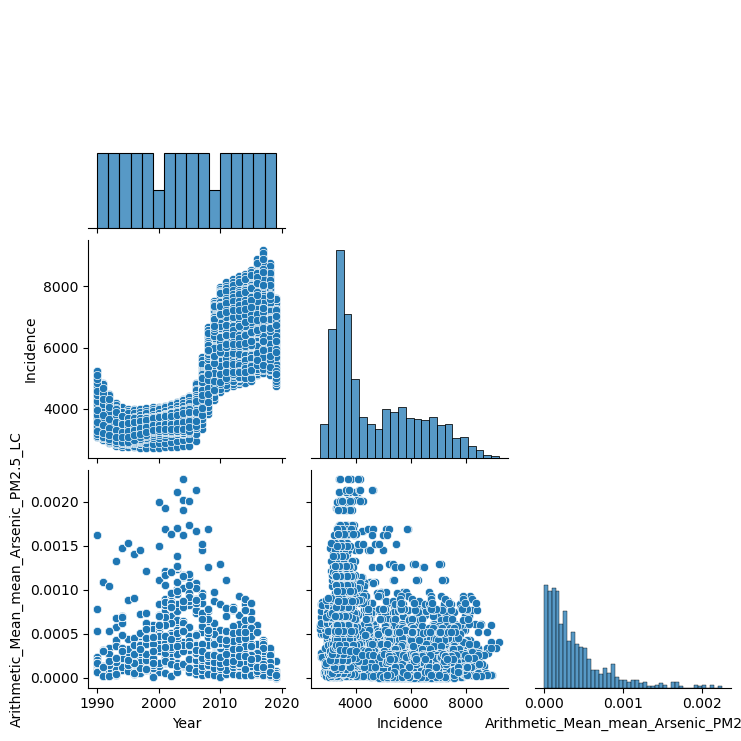

In [113]:
train_column_2to6 = train.iloc[:, 2:6]
sns.pairplot(train_column_2to6, corner=True);

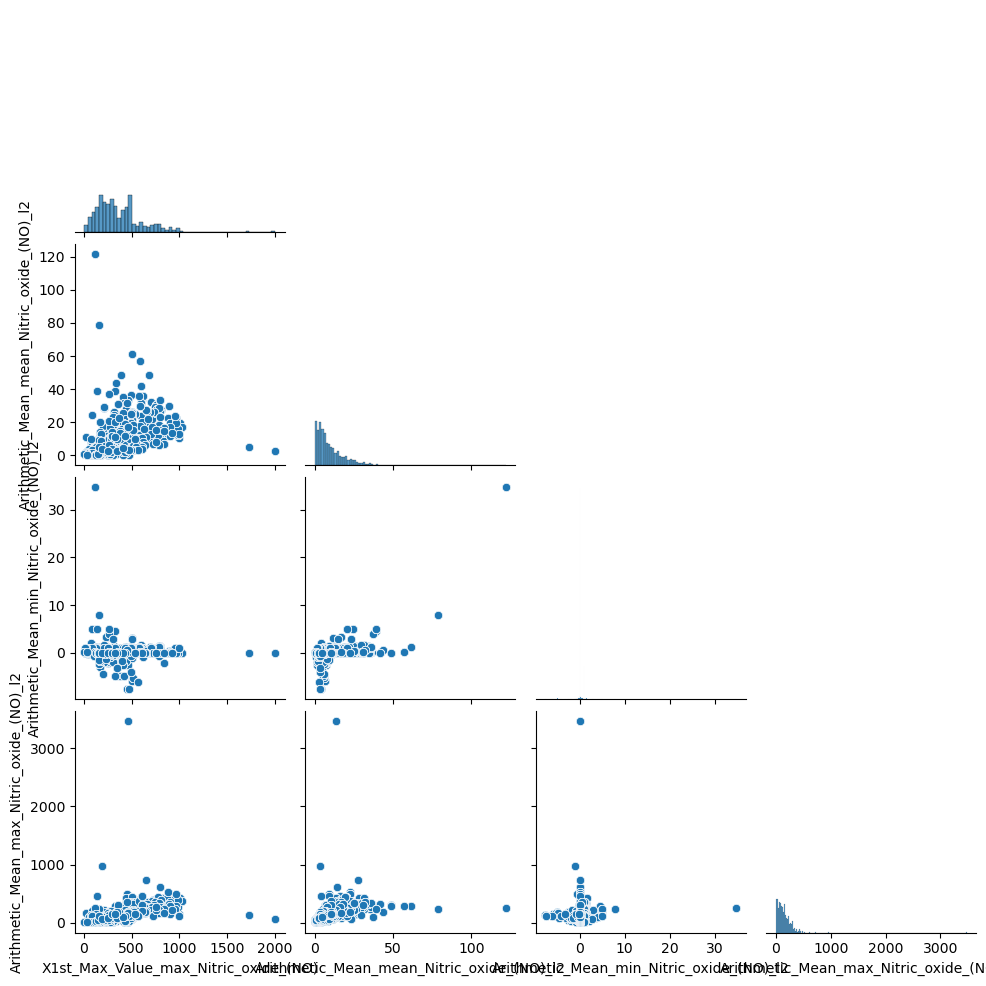

In [119]:
train_column_43to47 = train.iloc[:, 43:47]
sns.pairplot(train_column_43to47, corner=True);

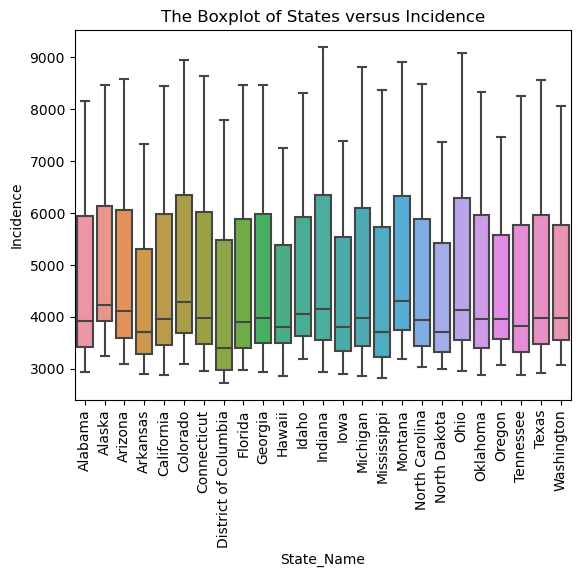

In [115]:
sns.boxplot(data = train, x='State_Name',y='Incidence')
plt.xticks(rotation = 90)
plt.title('The Boxplot of States versus Incidence');

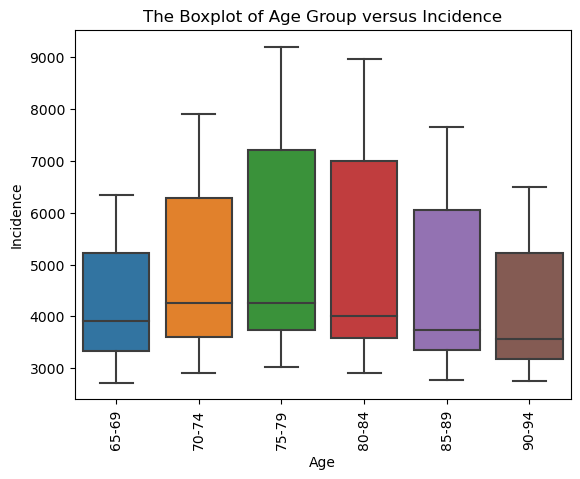

In [116]:
sns.boxplot(data = train, x='Age',y='Incidence')
plt.xticks(rotation = 90)
plt.title('The Boxplot of Age Group versus Incidence');

## Imputation

### Imputing data using Iterative Imputer

In [15]:
# Create varible X, y

X = train_dummy.drop(columns=['Incidence','ID','State_Name'])
y = train_dummy['Incidence']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

## Modeling

In [17]:
# use thid funtion to save all the result 

In [18]:
def evaluation(X_test, y_test, preds, model):
    R2 = r2_score(y_test, preds)
    #MSE = mean_squared_error(y_test, preds)
    RMSE = np.sqrt(mean_squared_error(y_test, preds))
    #MAE = mean_absolute_error(y_test, preds)

    print(f'R2: {R2}')
    #print(f'MSE: {MSE}')
    print(f'RMSE: {RMSE}')
    #print(f'MAE: {MAE}')

    return {
        'R2': R2,
        #'MSE': MSE,
        'RMSE': RMSE,
        #'MAE': MAE
    }

In [19]:
scores =[]

### LinearRegrssion

In [20]:
lr = Pipeline([
    ("it_imp", IterativeImputer(estimator=LinearRegression(),max_iter=100,)),
    ("lr", LinearRegression())]
)

In [21]:
lr.fit(X_train,y_train)

Pipeline(steps=[('it_imp',
                 IterativeImputer(estimator=LinearRegression(), max_iter=100)),
                ('lr', LinearRegression())])

In [22]:
lr.score(X_train,y_train), lr.score(X_test,y_test)

(0.7691887545836131, 0.75440765345233)

In [23]:
lr_preds = lr.predict(X_test)

In [24]:
MSE_lr = mean_squared_error(y_test,lr_preds)
MSE_lr

580214.0220337312

In [25]:
RMSE_lr = np.sqrt(mean_squared_error(y_test,lr_preds))
RMSE_lr

761.7178099754076

In [26]:
MAE_lr = mean_absolute_error(y_test,lr_preds)
MAE_lr

611.6642498916053

In [27]:
r2_score(y_test,lr_preds)

0.75440765345233

In [28]:
scores.append(evaluation(X_test,y_test,lr_preds,lr))

R2: 0.75440765345233
RMSE: 761.7178099754076


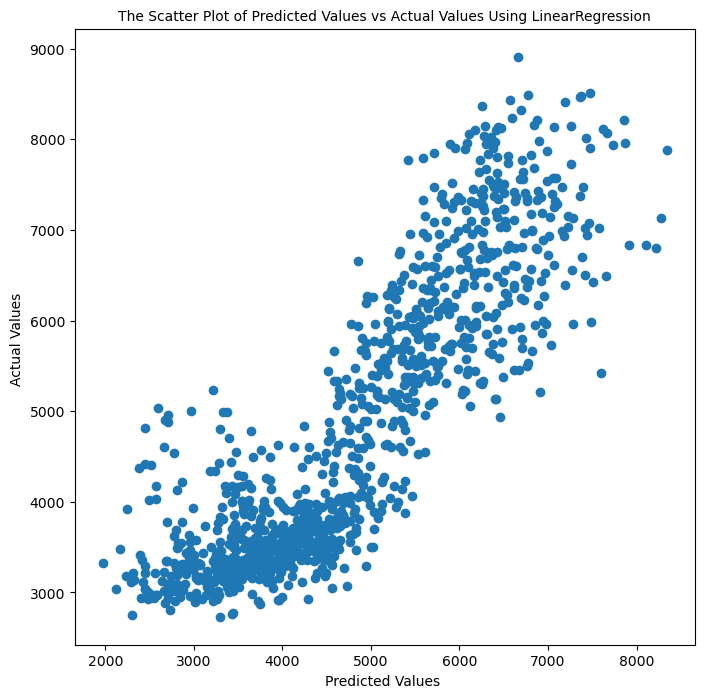

In [106]:
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(lr_preds, y_test)
plt.xlabel("Predicted Values ")
plt.ylabel("Actual Values ")
plt.title('The Scatter Plot of Predicted Values vs Actual Values Using LinearRegression', size=10)
plt.show();

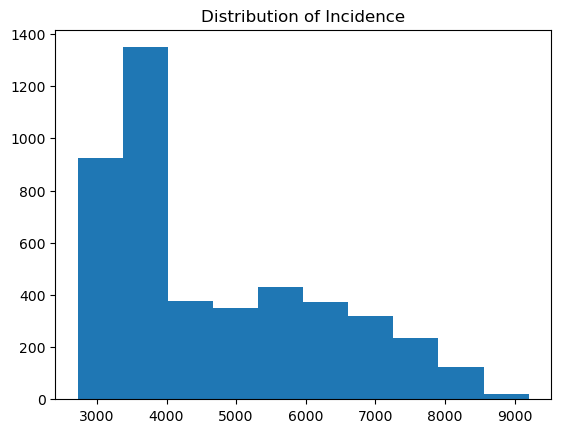

In [117]:
plt.hist(train['Incidence'])
plt.title("Distribution of Incidence");

### Predict test data

In [29]:
test_preds_lr = lr.predict(test_numeric)

In [30]:
test_preds_lr = pd.DataFrame({
    'ID': test['ID'],
    'Incidence': test_preds_lr,
})

test_preds_lr.head()

,ID,Incidence
0,6c06615,2445.184973
1,e0cf76e,3062.225065
2,e9f95f0,3500.914633
3,5dffe44,3326.510797
4,9f9ea9b,2769.857415


In [31]:
#test_preds_lr.to_csv('../lr_model_3.csv', index=False)

### RandomforestRegressor

In [32]:
rf = Pipeline([
    ("it_imp", IterativeImputer(max_iter=100)),
    ("ss", StandardScaler()),
    ("rf", RandomForestRegressor())]
)

In [33]:
rf.fit(X_train, y_train)

Pipeline(steps=[('it_imp', IterativeImputer(max_iter=100)),
                ('ss', StandardScaler()), ('rf', RandomForestRegressor())])

In [34]:
rf.score(X_train, y_train), rf.score(X_test,y_test)

(0.9967044050325633, 0.975812921028981)

In [35]:
rf_preds = rf.predict(X_test)

In [36]:
MSE_rf = mean_squared_error(y_test,rf_preds)
MSE_rf

57142.181213283184

In [37]:
RMSE_rf = np.sqrt(MSE_rf)
RMSE_rf

239.0443080545596

In [38]:
MAE_rf = mean_absolute_error(y_test,rf_preds)
MAE_rf

166.60956203539405

In [39]:
scores.append(evaluation(X_test,y_test,rf_preds,rf))

R2: 0.975812921028981
RMSE: 239.0443080545596


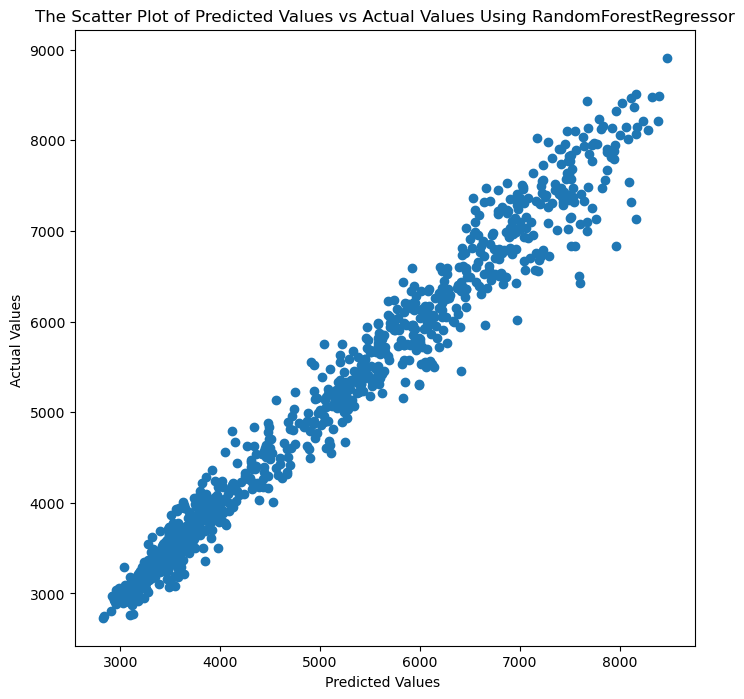

In [104]:
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(rf_preds, y_test)
plt.xlabel("Predicted Values ")
plt.ylabel("Actual Values ")
plt.title('The Scatter Plot of Predicted Values vs Actual Values Using RandomForestRegressor')
plt.show();

#### Predict test data

In [40]:
X_test.shape

(1125, 51)

In [41]:
test_numeric.shape

(4680, 51)

In [42]:
test_preds_rf = rf.predict(test_numeric)

In [43]:
test_preds_rf = pd.DataFrame({
    'ID': test['ID'],
    'Incidence': test_preds_rf,
})

test_preds_rf.head()

,ID,Incidence
0,6c06615,4697.096185
1,e0cf76e,4816.260109
2,e9f95f0,4477.784364
3,5dffe44,3802.778180
4,9f9ea9b,3463.812558


In [44]:
#test_preds_rf.to_csv('../rf_model_4.csv', index=False)

### AdaBoost Regressor

In [45]:
abr = Pipeline([
    ("it_imp", IterativeImputer(max_iter=100)),
    #("ss",StandardScaler()),
    ("abr", AdaBoostRegressor(random_state=42,
                              estimator=DecisionTreeRegressor()))]
)

In [46]:
abr_pipe_params = {
    'abr__n_estimators' : [100]} #[150,200,300,400] 

In [47]:
abr_gs = GridSearchCV(abr, abr_pipe_params) #cv=5)

In [48]:
abr_gs.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('it_imp',
                                        IterativeImputer(max_iter=100)),
                                       ('abr',
                                        AdaBoostRegressor(estimator=DecisionTreeRegressor(),
                                                          random_state=42))]),
             param_grid={'abr__n_estimators': [100]})

In [49]:
abr_gs.score(X_train,y_train), abr_gs.score(X_test,y_test)

(0.9996045870239607, 0.9757852078682748)

In [50]:
abr_gs.best_params_

{'abr__n_estimators': 100}

In [51]:
abr_gs_preds = abr_gs.predict(X_test)

In [122]:
scores.append(evaluation(X_test,y_test,abr_gs_preds,abr_gs))

R2: 0.9757852078682748
RMSE: 239.18121538447377


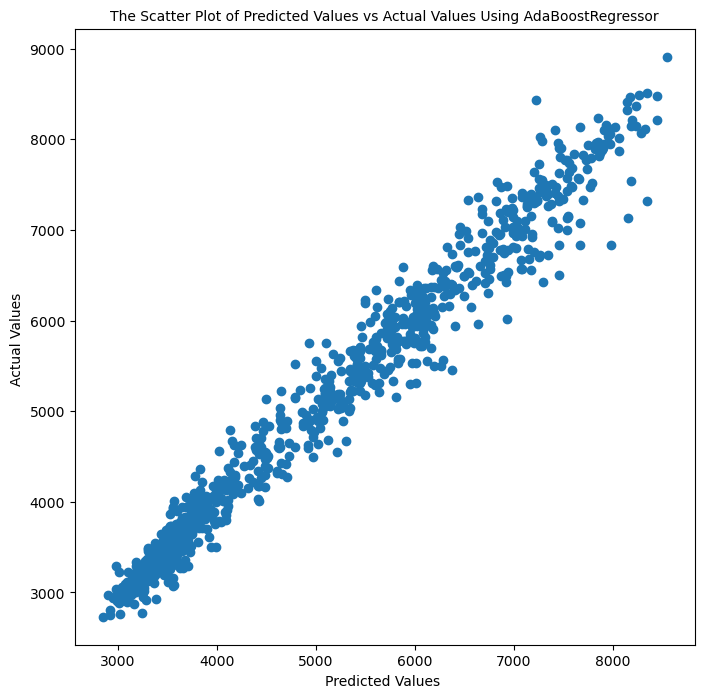

In [103]:
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(abr_gs_preds, y_test)
plt.xlabel("Predicted Values ")
plt.ylabel("Actual Values ")
plt.title('The Scatter Plot of Predicted Values vs Actual Values Using AdaBoostRegressor', size=10)
plt.show();

### Predict test data

In [53]:
test_preds_abr = abr_gs.predict(test_numeric)

In [54]:
test_preds_abr = pd.DataFrame({
    'ID': test['ID'],
    'Incidence': test_preds_abr,
})

test_preds_abr.head()

,ID,Incidence
0,6c06615,4694.653998
1,e0cf76e,4810.174610
2,e9f95f0,4487.052247
3,5dffe44,3828.460268
4,9f9ea9b,3483.560462


In [55]:
test_preds_abr.to_csv('../abr_model.csv', index=False)

### ExtraTreesRegressor

In [56]:
etr = Pipeline([
    ("it_imp", IterativeImputer(max_iter=100)),
    ("ss", StandardScaler()),
    ("etc", ExtraTreesRegressor())]
)

In [57]:
etr_pipe_params = {
    'etc__n_estimators' :[100], #[200,300,400],
    'etc__max_depth' : [None] #[2,3,4]
} 

In [58]:
etr_gs = GridSearchCV(etr, etr_pipe_params, cv=5)

In [59]:
etr_gs.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('it_imp',
                                        IterativeImputer(max_iter=100)),
                                       ('ss', StandardScaler()),
                                       ('etc', ExtraTreesRegressor())]),
             param_grid={'etc__max_depth': [None], 'etc__n_estimators': [100]})

In [60]:
etr_gs.score(X_train,y_train), etr_gs.score(X_test,y_test)

(0.9998924230694293, 0.9767362966328033)

In [61]:
etr_gs.best_params_

{'etc__max_depth': None, 'etc__n_estimators': 100}

In [62]:
etr_gs_preds = etr_gs.predict(X_test)

In [123]:
scores.append(evaluation(X_test,y_test,etr_gs_preds,etr_gs))

R2: 0.9767362966328033
RMSE: 234.4369818122377


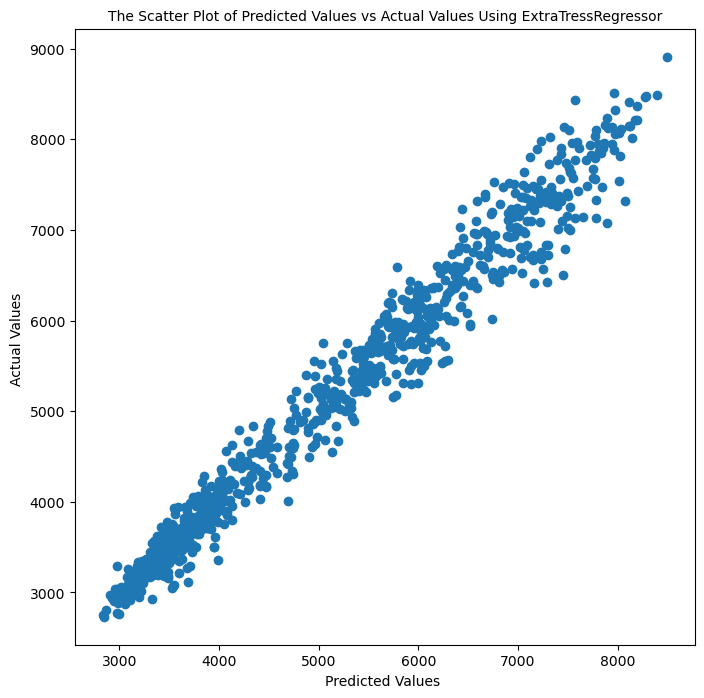

In [102]:
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(etr_gs_preds, y_test)
plt.xlabel("Predicted Values ")
plt.ylabel("Actual Values ")
plt.title('The Scatter Plot of Predicted Values vs Actual Values Using ExtraTressRegressor', size=10)
plt.show();

### GradientBoostingRegressor

In [65]:
gbr = Pipeline([
    ("it_imp", IterativeImputer(max_iter=100)),
    #("ss", StandardScaler()),
    ("gbr", GradientBoostingRegressor())]
)

In [66]:
gbr.fit(X_train, y_train)

Pipeline(steps=[('it_imp', IterativeImputer(max_iter=100)),
                ('gbr', GradientBoostingRegressor())])

In [67]:
gbr.score(X_train,y_train), gbr.score(X_test,y_test)

(0.9760627015189618, 0.9686314629888689)

In [69]:
gbr_preds = gbr.predict(X_test)

In [124]:
scores.append(evaluation(X_test,y_test,gbr_preds,gbr))

R2: 0.9686314629888689
RMSE: 272.228649000923


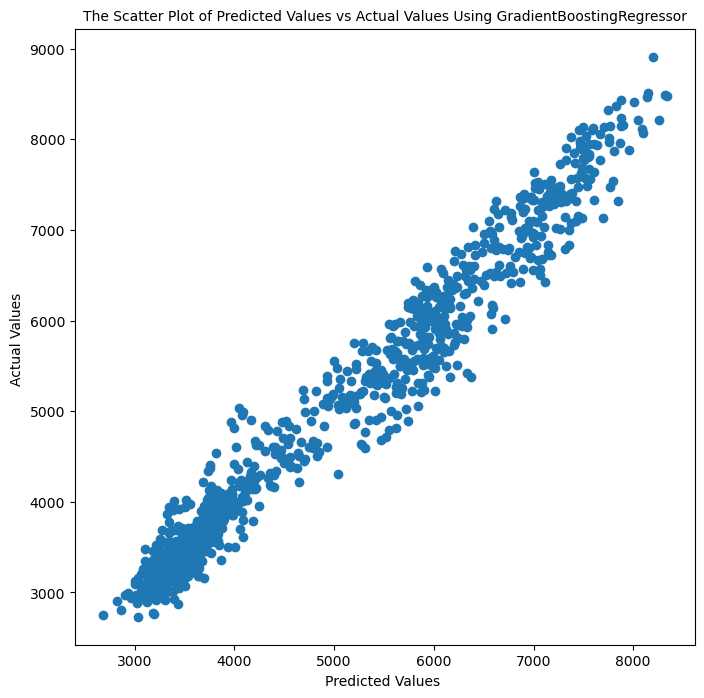

In [101]:
# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(gbr_preds, y_test)
plt.xlabel("Predicted Values ")
plt.ylabel("Actual Values ")
plt.title('The Scatter Plot of Predicted Values vs Actual Values Using GradientBoostingRegressor', size =10)
plt.show();

In [126]:
pd.DataFrame(scores, index=['Linear Regression','Random Forest Regressor', 
                            'AdaBoost Regressor', 'Extra Trees Regresssor',
                            'GradientBoosting Regressor'])

,R2,RMSE
Linear Regression,0.754408,761.717810
Random Forest Regressor,0.975813,239.044308
AdaBoost Regressor,0.975785,239.181215
Extra Trees Regresssor,0.976736,234.436982
GradientBoosting Regressor,0.968631,272.228649
